In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

print("tensorflow  version:",tf.__version__)

tensorflow  version: 2.20.0


In [23]:
#load the dataset
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [24]:
#check the shape

x_train.shape

(60000, 28, 28)

In [25]:
y_train.shape

(60000,)

In [26]:
x_test.shape


(10000, 28, 28)

In [27]:

y_test.shape

(10000,)

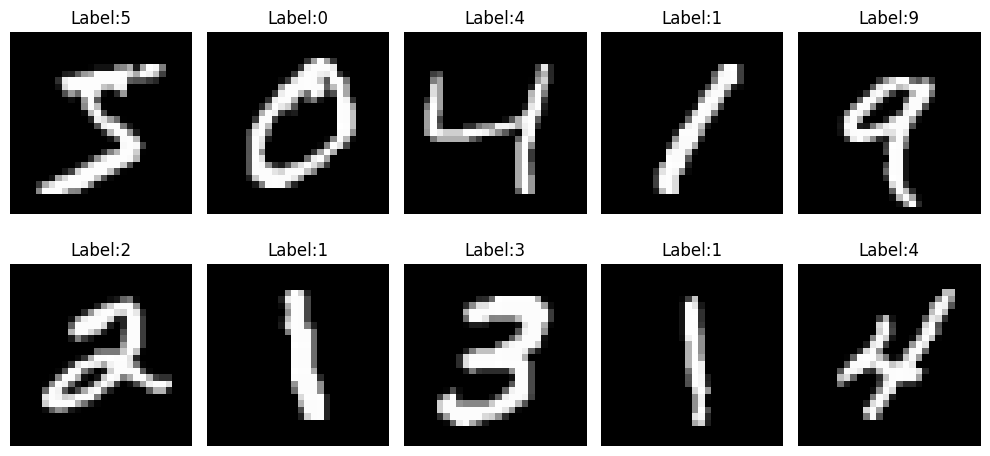

In [31]:
#display some imagaes

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.title(f"Label:{y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [35]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

#num_classes = 10 bcz we have 10 digits
num_classes=10
y_train_cat= keras.utils.to_categorical(y_train,num_classes)
y_test_cat = keras.utils.to_categorical(y_test,num_classes)

In [36]:
y_train[0]

np.uint8(5)

In [37]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [41]:
##define model architecture

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(num_classes,activation='softmax')
    ])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
##compile the model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
#ttrain the model
history=model.fit(x_train,y_train_cat,
    epochs=10,
    batch_size=128,
    validation_data=(x_test,y_test_cat))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9286 - loss: 0.2471 - val_accuracy: 0.9280 - val_loss: 0.2454
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9312 - loss: 0.2364 - val_accuracy: 0.9317 - val_loss: 0.2298
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9352 - loss: 0.2254 - val_accuracy: 0.9357 - val_loss: 0.2260
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9377 - loss: 0.2150 - val_accuracy: 0.9357 - val_loss: 0.2168
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9410 - loss: 0.2047 - val_accuracy: 0.9396 - val_loss: 0.2042
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9436 - loss: 0.1960 - val_accuracy: 0.9420 - val_loss: 0.1958
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9462 - loss: 0.1867 - val_accuracy: 0.9433 - val_loss: 0.1891
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9484 - loss: 0.1783 - val_accuracy: 0.

In [53]:
##evaluate the model on the test data

loss,accuracy = model.evaluate(x_test,y_test_cat)

print(f"\nTest loss:{loss:.4f}")
print(f"test accuracy:{accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9495 - loss: 0.1690

Test loss:0.1690
test accuracy:94.95%


In [54]:

loss,accuracy = model.evaluate(x_train,y_train_cat)

print(f"\nTest loss:{loss:.4f}")
print(f"test accuracy:{accuracy * 100:.2f}%")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9529 - loss: 0.1607

Test loss:0.1607
test accuracy:95.29%


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


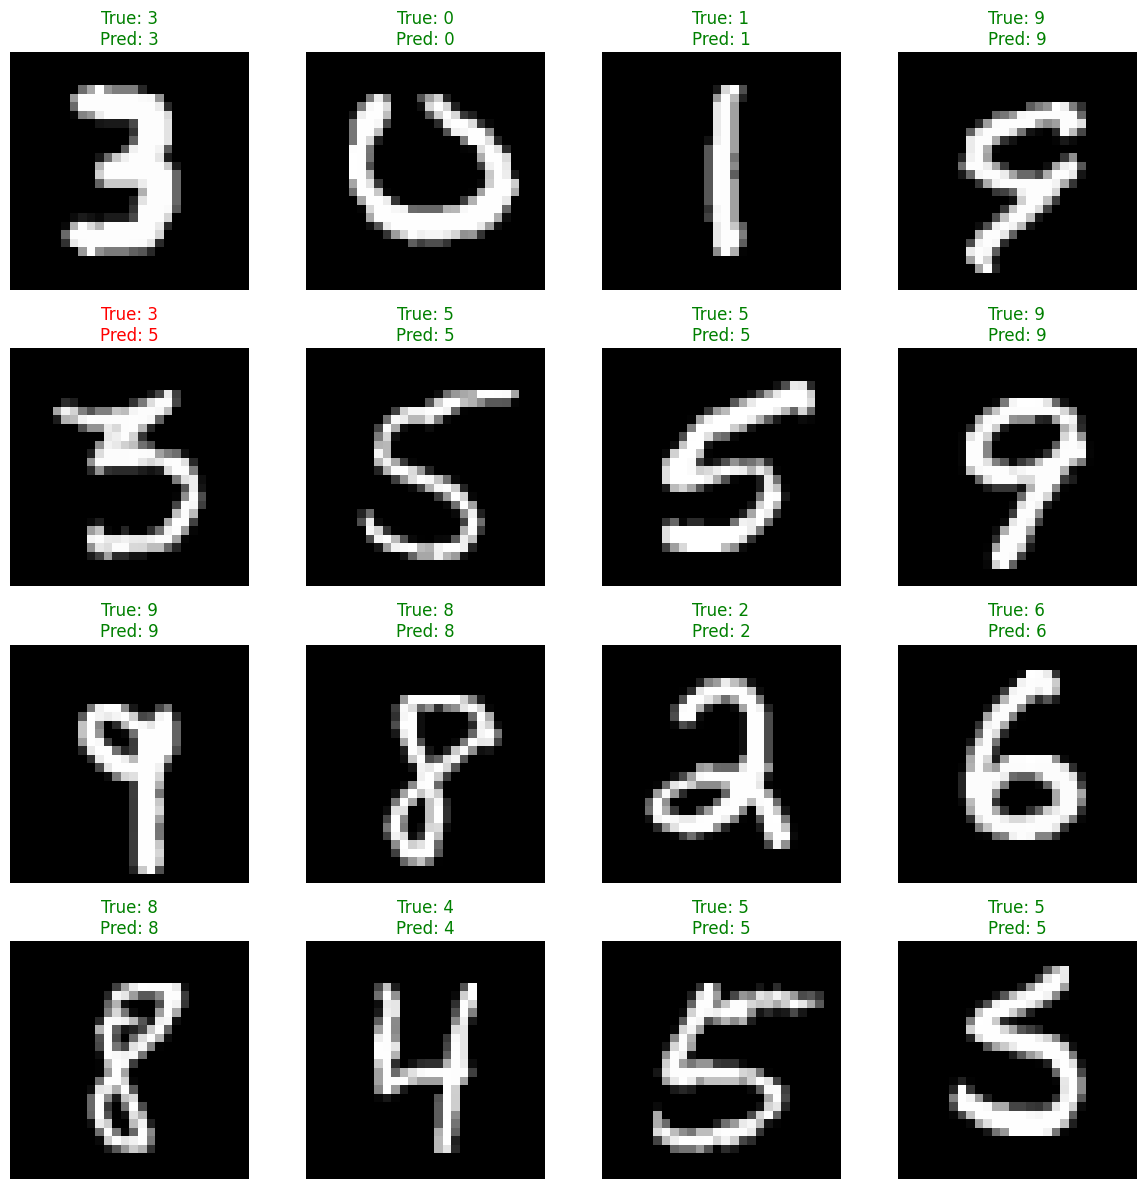

In [57]:
# Make predictions on the entire test set
predictions = model.predict(x_test)

# Display results for a few random images
# We use the original y_test for easy-to-read labels
plt.figure(figsize=(12, 12))
for i in range(16):
    # Pick a random index from the test set
    random_index = np.random.randint(0, x_test.shape[0])
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_test[random_index], cmap='gray')
    
    true_label = y_test[random_index]
    predicted_label = np.argmax(predictions[random_index])
    
    # Color the title red if the prediction is wrong
    title_color = 'green' if true_label == predicted_label else 'red'
    plt.title(f"True: {true_label}\nPred: {predicted_label}", color=title_color)
    plt.axis('off')

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


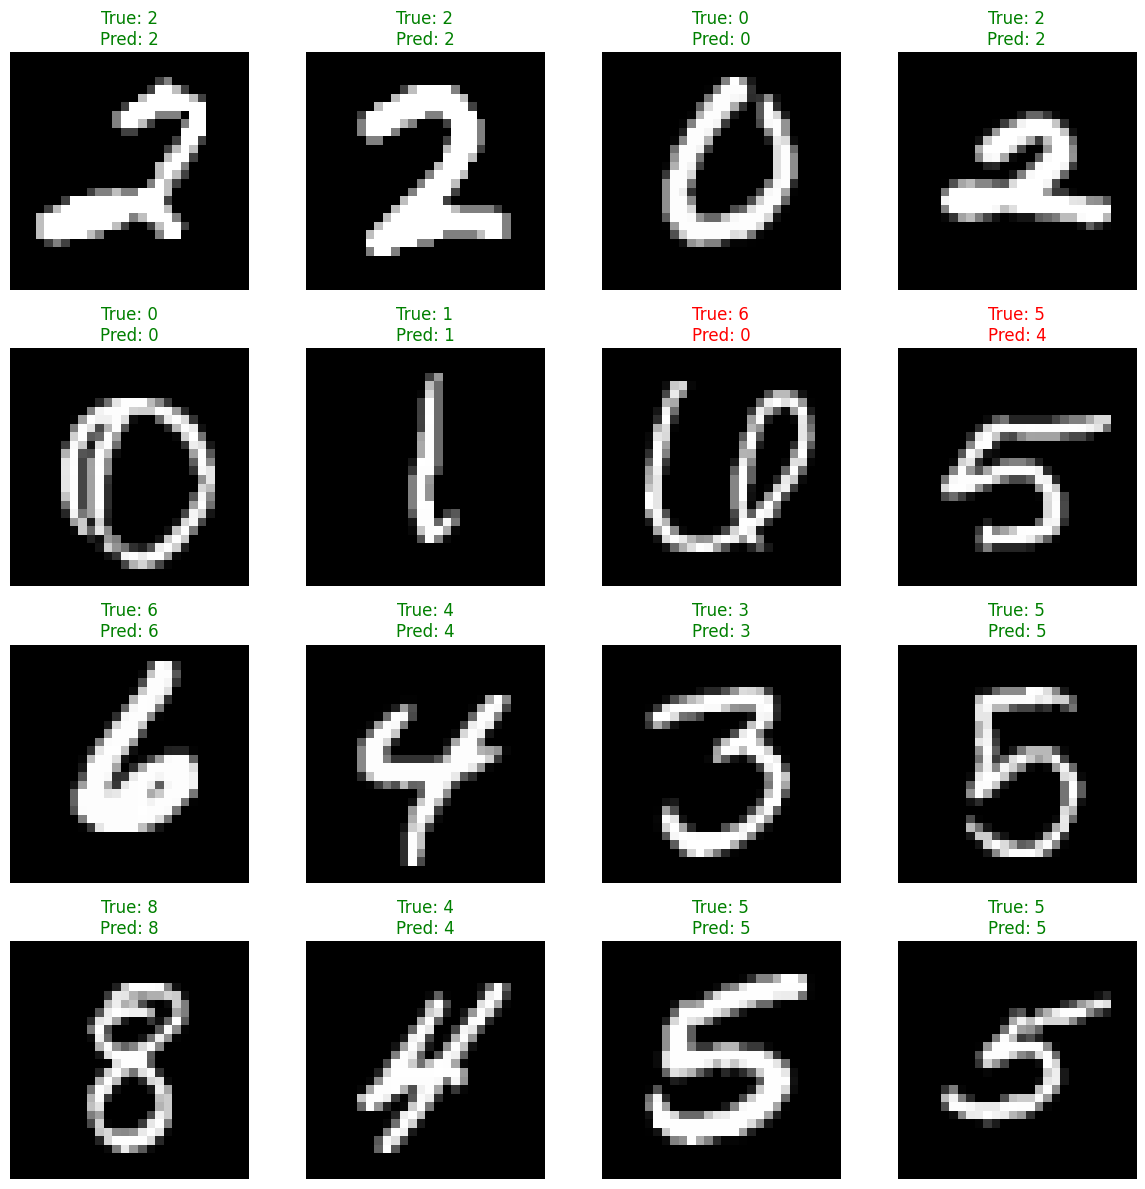

In [58]:
# Make predictions on the entire test set
predictions = model.predict(x_test)

# Display results for a few random images
# We use the original y_test for easy-to-read labels
plt.figure(figsize=(12, 12))
for i in range(16):
    # Pick a random index from the test set
    random_index = np.random.randint(0, x_test.shape[0])
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_test[random_index], cmap='gray')
    
    true_label = y_test[random_index]
    predicted_label = np.argmax(predictions[random_index])
    
    # Color the title red if the prediction is wrong
    title_color = 'green' if true_label == predicted_label else 'red'
    plt.title(f"True: {true_label}\nPred: {predicted_label}", color=title_color)
    plt.axis('off')

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


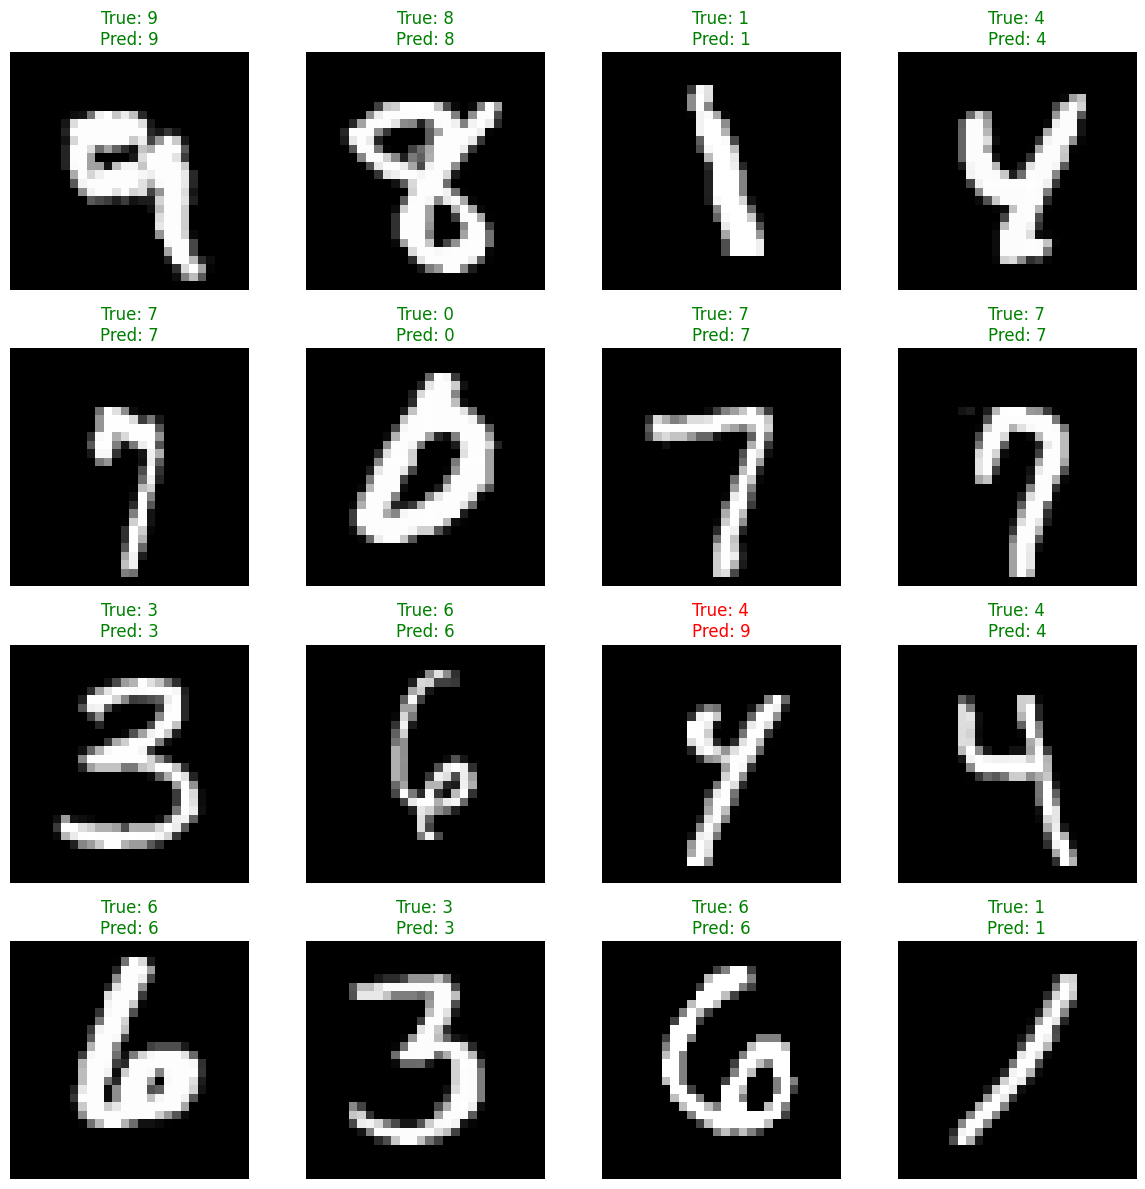

In [59]:
# Make predictions on the entire test set
predictions = model.predict(x_test)

# Display results for a few random images
# We use the original y_test for easy-to-read labels
plt.figure(figsize=(12, 12))
for i in range(16):
    # Pick a random index from the test set
    random_index = np.random.randint(0, x_test.shape[0])
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_test[random_index], cmap='gray')
    
    true_label = y_test[random_index]
    predicted_label = np.argmax(predictions[random_index])
    
    # Color the title red if the prediction is wrong
    title_color = 'green' if true_label == predicted_label else 'red'
    plt.title(f"True: {true_label}\nPred: {predicted_label}", color=title_color)
    plt.axis('off')

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


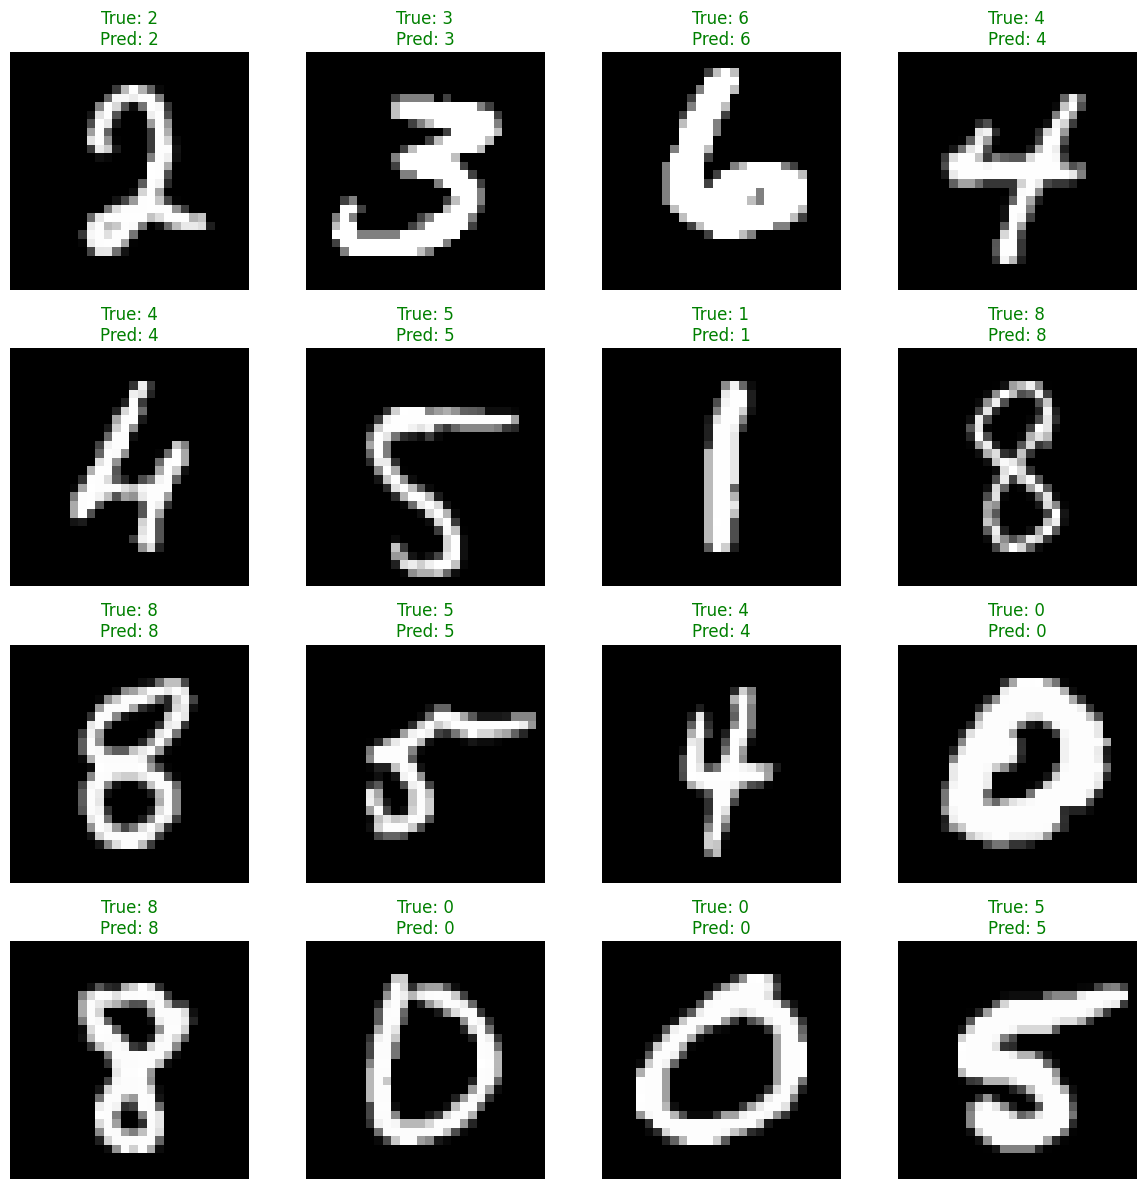

In [60]:
# Make predictions on the entire test set
predictions = model.predict(x_test)

# Display results for a few random images
# We use the original y_test for easy-to-read labels
plt.figure(figsize=(12, 12))
for i in range(16):
    # Pick a random index from the test set
    random_index = np.random.randint(0, x_test.shape[0])
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_test[random_index], cmap='gray')
    
    true_label = y_test[random_index]
    predicted_label = np.argmax(predictions[random_index])
    
    # Color the title red if the prediction is wrong
    title_color = 'green' if true_label == predicted_label else 'red'
    plt.title(f"True: {true_label}\nPred: {predicted_label}", color=title_color)
    plt.axis('off')

plt.tight_layout()
plt.show()